In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
df_munic = pd.read_csv("https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv", sep=";", encoding="latin1")


In [178]:
df_munic
df_munic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12604 entries, 0 to 12603
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fmun_cod                    12604 non-null  int64 
 1   fmun                        12604 non-null  object
 2   ano                         12604 non-null  int64 
 3   mes                         12604 non-null  int64 
 4   mes_ano                     12604 non-null  object
 5   regiao                      12604 non-null  object
 6   hom_doloso                  12604 non-null  int64 
 7   lesao_corp_morte            12604 non-null  int64 
 8   latrocinio                  12604 non-null  int64 
 9   cvli                        12604 non-null  int64 
 10  hom_por_interv_policial     12604 non-null  int64 
 11  letalidade_violenta         12604 non-null  int64 
 12  tentat_hom                  12604 non-null  int64 
 13  lesao_corp_dolosa           12604 non-null  in

In [179]:
reg_lagos = ['Araruama','Armação dos Búzios', 'Arraial do Cabo', 'Cabo Frio', 'Iguaba Grande', 'São Pedro da Aldeia','Saquarema']
crimes_viol = ['hom_doloso', 'lesao_corp_morte','latrocinio','cvli','hom_por_interv_policial','letalidade_violenta','tentat_hom','lesao_corp_dolosa','estupro']


In [180]:
df_munic['crimes_violentos'] = pd.concat([
    df_munic['hom_doloso'],
    df_munic['lesao_corp_morte'],
    df_munic['latrocinio'],
    df_munic['cvli'],
    df_munic['hom_por_interv_policial'],
    df_munic['letalidade_violenta'],
    df_munic['tentat_hom'],
    df_munic['lesao_corp_dolosa'],
    df_munic['estupro']
    ], axis=1).sum(axis=1)
df_crimes_violentos = df_munic.groupby('fmun')['crimes_violentos'].sum().reset_index()
df_lagos = df_crimes_violentos.loc[df_crimes_violentos['fmun'].isin(reg_lagos)]
df_lagos = df_lagos.sort_values(by='crimes_violentos')#, ascending=False)


In [181]:
df_lagos

,fmun,crimes_violentos
31,Iguaba Grande,1962
7,Arraial do Cabo,2779
6,Armação dos Búzios,3477
111,São Pedro da Aldeia,5981
90,Saquarema,6829
3,Araruama,9128
14,Cabo Frio,15913


In [182]:
df_lagos_array = np.array(df_lagos['crimes_violentos'])
media_lagos = np.mean(df_lagos_array)
mediana_lagos = np.median(df_lagos_array)
dist_lagos = (media_lagos - mediana_lagos)/mediana_lagos
print(f'Media= {media_lagos}\nMediana= {mediana_lagos}\nDistância= {dist_lagos}')

Media= 6581.285714285715
Mediana= 5981.0
Distância= 0.10036544295029505


In [183]:
q1_lg = np.percentile(df_lagos_array, 25)
q2_lg = np.percentile(df_lagos_array, 50)
q3_lg = np.percentile(df_lagos_array, 75)
iqr_lg = q3_lg - q1_lg
lim_sup_lg = q3_lg + (1.5 * iqr_lg)
lim_inf_lg = q1_lg - (1.5 * iqr_lg)
print(f'Q1= {q1_lg}  Q2= {q2_lg}  Q3= {q3_lg}\nLimite superior= {lim_sup_lg}\nLimite Inferior= {lim_inf_lg}')


Q1= 3128.0  Q2= 5981.0  Q3= 7978.5
Limite superior= 15254.25
Limite Inferior= -4147.75


In [184]:
outlier_lagos = df_lagos.loc[(df_lagos['crimes_violentos']>= lim_sup_lg) & (df_lagos['crimes_violentos']<= lim_inf_lg)]
outlier_lagos

,fmun,crimes_violentos


In [185]:
cv_menor25 = df_lagos.loc[(df_lagos['crimes_violentos']<=q1_lg)]
cv_menor25

,fmun,crimes_violentos
31,Iguaba Grande,1962
7,Arraial do Cabo,2779


In [186]:
cv_medio = df_lagos.loc[(df_lagos['crimes_violentos']>q1_lg) & (df_lagos['crimes_violentos']<q3_lg)]
cv_medio

,fmun,crimes_violentos
6,Armação dos Búzios,3477
111,São Pedro da Aldeia,5981
90,Saquarema,6829


In [187]:
cv_maior25 = df_lagos.loc[(df_lagos['crimes_violentos']>=q3_lg)]
cv_maior25

,fmun,crimes_violentos
3,Araruama,9128
14,Cabo Frio,15913


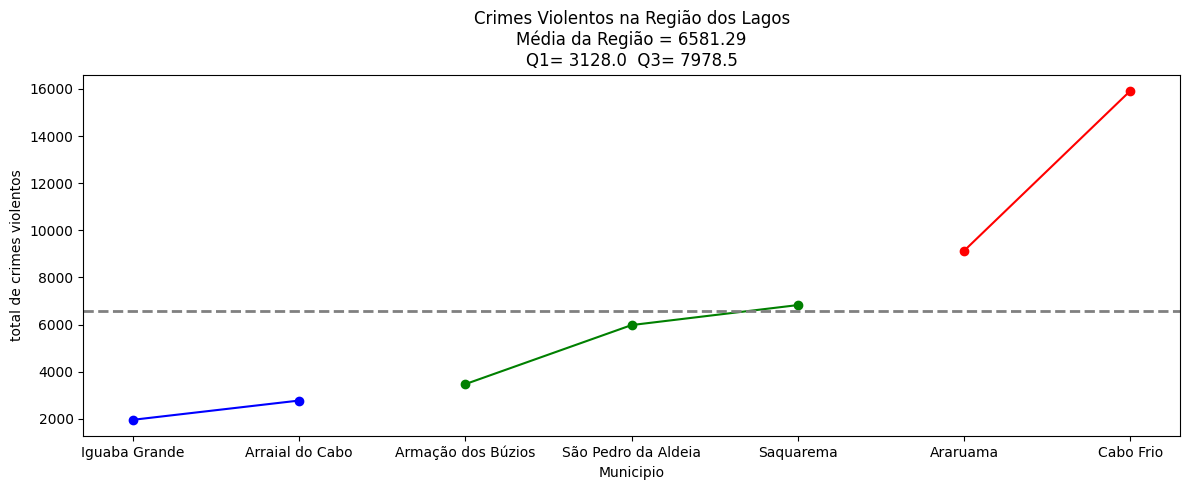

In [188]:
plt.figure(figsize=(12,5))
plt.plot(cv_menor25['fmun'], cv_menor25['crimes_violentos'], marker='o', linestyle='-', color = 'blue')
plt.plot(cv_medio['fmun'], cv_medio['crimes_violentos'], marker='o', linestyle='-', color = 'green')
plt.plot(cv_maior25['fmun'], cv_maior25['crimes_violentos'], marker='o', linestyle='-', color = 'red')
plt.title(f'Crimes Violentos na Região dos Lagos\nMédia da Região = {media_lagos:.2f}\nQ1= {q1_lg}  Q3= {q3_lg}')
plt.xlabel('Municipio')
plt.ylabel('total de crimes violentos')
plt.axhline(y=media_lagos, color='gray', linestyle='--', linewidth=2, label=f'Média: {media_lagos}')
plt.tight_layout()
plt.show()



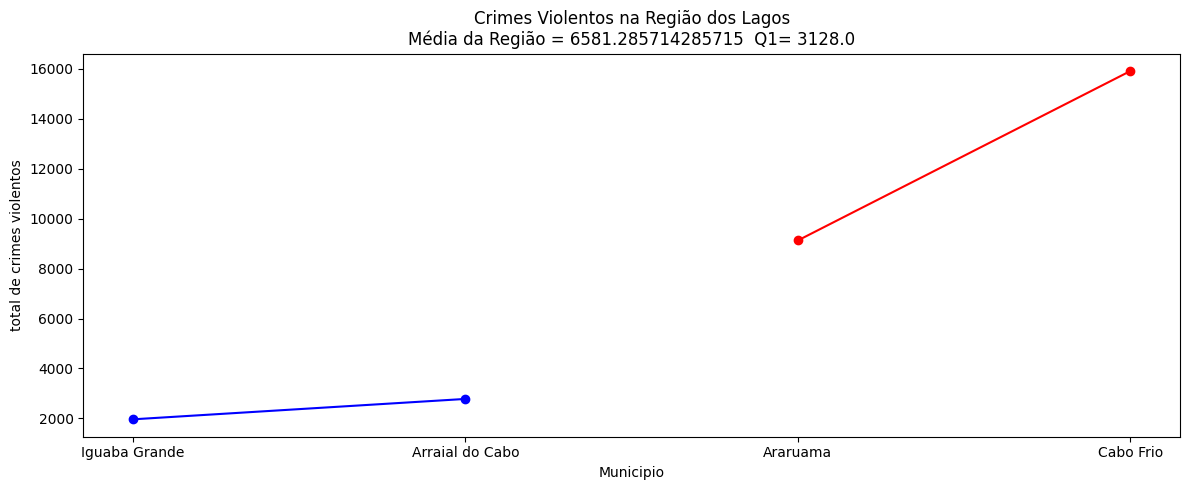

In [189]:
plt.figure(figsize=(12,5))
plt.plot(cv_menor25['fmun'], cv_menor25['crimes_violentos'], marker='o', linestyle='-', color = 'blue')
plt.plot(cv_maior25['fmun'], cv_maior25['crimes_violentos'], marker='o', linestyle='-', color = 'red')
plt.title(f'Crimes Violentos na Região dos Lagos\nMédia da Região = {media_lagos}  Q1= {q1_lg}')
plt.xlabel('Municipio')
plt.ylabel('total de crimes violentos')
plt.tight_layout()
plt.show()